In [1]:
import pickle
import matplotlib.pylab as pl
import numpy as np
# pl.rcParams['figure.dpi']= 300

In [2]:
result_parent_folder = '../output/active_learning/'

# random selection vs. active learning

In [5]:
result_folder = result_parent_folder + '01.random_sampling_vs_AL/'

In [6]:
result_name = result_folder + \
'zaretzki_r5_5folds_random_split_result_0.3_TH_RandomSampling_AllFolds_1.0repeats.pickle'

with open(result_name, 'rb') as f:
    result_rs_random_split = pickle.load(f)

In [7]:
result_name = result_folder + \
'zaretzki_r5_5folds_random_split_result_0.3_TH_AL_AllFolds_1.0repeats.pickle'

with open(result_name, 'rb') as f:
    result_al_random_split = pickle.load(f)

In [8]:
for i in range(5):
    maxiter = np.argmax(result_rs_random_split[0][i])
    best_mcc = result_rs_random_split[0][i][maxiter]
    print(best_mcc)

0.5893844384489568
0.589445860853834
0.6014739816323476
0.557016176158717
0.5735843669124459


In [9]:
for i in range(5):
    maxiter = np.argmax(result_al_random_split[0][i])
    best_mcc = result_al_random_split[0][i][maxiter]
    print(best_mcc)

0.6050655246859088
0.618952089730421
0.6196151672054789
0.5709964471680791
0.5818864486171191


In [10]:
# put results together
result_compare = ([],[],[],[])
for result in [result_rs_random_split,result_al_random_split]:
    for j in range(5):
        for i in range(4):
            result_compare[i].append(result[i][j])

Text(0.5, 0, 'Proportion of the active learning set used for training')

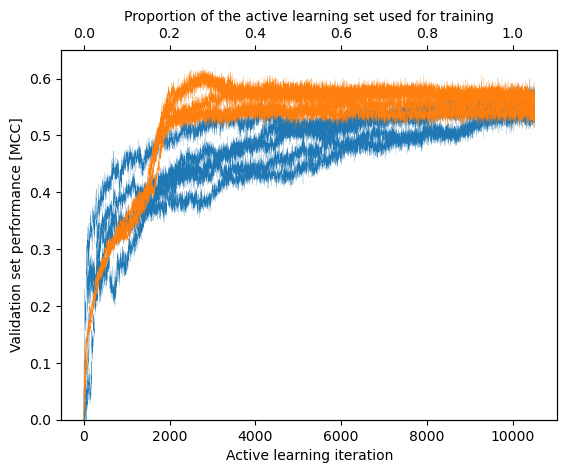

In [11]:
fig, ax1 = pl.subplots()
ax2 = ax1.twiny()
ax1.set_ylim([0,0.65])
    
color_al_rs = pl.rcParams['axes.prop_cycle'].by_key()['color'][:2]
colors = list(np.repeat(color_al_rs,5))
for i in range(len(result_compare[0])):
    maxiter = np.argmax(result_compare[0][i])
    ax1.plot(result_compare[0][i],color=colors[i],linewidth=0.1)

ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(x/len(result_compare[0][0]),1) for x in ax1.get_xticks()])

ax1.set_xlabel("Active learning iteration")
ax1.set_ylabel("Validation set performance [MCC]")
ax2.set_xlabel('Proportion of the active learning set used for training')

Text(0, 0.5, 'Postive label ratio')

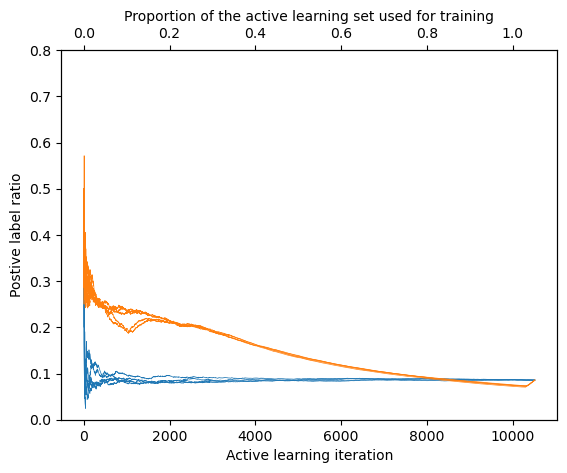

In [12]:
fig, ax1 = pl.subplots()
ax2 = ax1.twiny()
ax1.set_ylim([0,0.8])
    
color_al_rs = pl.rcParams['axes.prop_cycle'].by_key()['color'][:2]
colors = list(np.repeat(color_al_rs,5))
for i in range(len(result_compare[0])):
    ax1.plot(result_compare[1][i],color=colors[i],linewidth=0.5) 

ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(x/len(result_compare[0][0]),1) for x in ax1.get_xticks()])

ax1.set_xlabel("Active learning iteration")
ax2.set_xlabel('Proportion of the active learning set used for training')
ax1.set_ylabel("Postive label ratio")

# different first picks 

In [13]:
result_folder = result_parent_folder + '02.diffFirstSamples_diff_splits/'

In [14]:
result_name = result_folder + \
'zaretzki_r5_5folds_random_split_result_0.3_TH_AL_diffFirstSamples_Fold1_5repeats.pickle'

with open(result_name, 'rb') as f:
    result_dfs_random_split = pickle.load(f)

Text(0.5, 0, 'Proportion of the active learning set used for training')

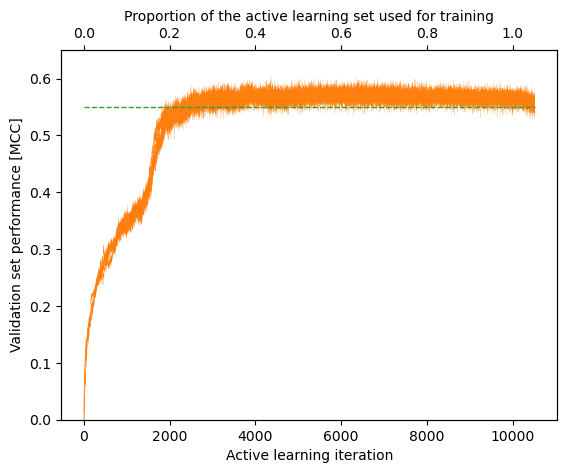

In [18]:
fig, ax1 = pl.subplots()

ax2 = ax1.twiny()
ax1.set_ylim([0,0.65])
    
colors = pl.rcParams['axes.prop_cycle'].by_key()['color'][:3]
for i in range(len(result_dfs_random_split[0])):
    maxiter = np.argmax(result_dfs_random_split[0][i])
    ax1.plot(result_dfs_random_split[0][i],color=colors[1],linewidth=0.1)

ax1.plot([0,len(result_dfs_random_split[0][i])],[result_dfs_random_split[0][i][-1]]*2,'--',color=colors[2],linewidth=1)

ax2.set_xticks( ax1.get_xticks() )
ax2.set_xbound(ax1.get_xbound())
ax2.set_xticklabels([round(x/len(result_dfs_random_split[0][0]),1) for x in ax1.get_xticks()])

ax1.set_xlabel("Active learning iteration")
ax1.set_ylabel("Validation set performance [MCC]")
ax2.set_xlabel('Proportion of the active learning set used for training')
